In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the weights
Theta1 = np.array([[1, -1, 0.5, 1], [2, -2, 1, -1]])
Theta2 = np.array([[-1, 2, 1]])

# Define the input data
X1 = np.array([1, 0, 3, -1])  # i. (0, 3 − 1)
X2 = np.array([1, 1, 2, 1])  # ii. (1, 2, 1)
X3 = np.array([1, -1, 1, 2]) # iii. (-1, 1, 2)

# Perform forward propagation
A1 = sigmoid(np.dot(X1, Theta1.T))
A2 = sigmoid(np.dot(np.insert(A1, 0, 1), Theta2.T))

print("Output for input (0, 3 - 1):", A2)  # Output for i.

A1 = sigmoid(np.dot(X2, Theta1.T))
A2 = sigmoid(np.dot(np.insert(A1, 0, 1), Theta2.T))

print("Output for input (1, 2, 1):", A2)  # Output for ii.

A1 = sigmoid(np.dot(X3, Theta1.T))
A2 = sigmoid(np.dot(np.insert(A1, 0, 1), Theta2.T))

print("Output for input (-1, 1, 2):", A2)  # Output for iii.

Output for input (0, 3 - 1): [0.83653594]
Output for input (1, 2, 1): [0.8164761]
Output for input (-1, 1, 2): [0.87331584]


In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def forward_propagation(inputs, weights):
    # Add bias node (x0 = 1) to the inputs
    # inputs = np.insert(inputs, 0, 1)
    
    # Calculate the activations of the hidden layer
    hidden_activations = sigmoid(np.dot(weights[0], inputs))
    
    # Add bias node (x0 = 1) to the hidden activations
    hidden_activations = np.insert(hidden_activations, 0, 1)
    
    # Calculate the output of the neural network
    output = sigmoid(np.dot(weights[1], hidden_activations))
    
    return hidden_activations, output

def backpropagation(inputs, targets, weights, learning_rate):
    # Perform forward propagation to get the hidden activations and output
    hidden_activations, output = forward_propagation(inputs, weights)
    
    # Calculate the error at the output layer
    output_error = output - targets
    
    # Calculate the error at the hidden layer
    hidden_error = np.dot(weights[1].T, output_error) * sigmoid_derivative(hidden_activations)
    
    # Update the weights at the hidden-output layer
    weights[1] = weights[1].astype('float64')
    weights[1] -= learning_rate * np.outer(output_error, hidden_activations)
    
    # Update the weights at the input-hidden layer
    weights[0] = weights[0].astype('float64')
    weights[0] -= learning_rate * np.outer(hidden_error[1:], inputs)
    
    
    return weights

# Define the initial weights
weights = [
    np.array([[1, -1, 0.5, 1], [2, -2, 1, -1]]),  # Θ(1)
    np.array([[-1, 2, 1]])  # Θ(2)
]

# Define the input data and targets
training_data = [
    (np.array([1, 0, 3, -1]), 0),   # (0, 3, -1) with target 0
    (np.array([1, 1, 2, 1]), 1),    # (1, 2, 1) with target 1
    (np.array([1, -1, 1, 2]), 0)    # (-1, 1, 2) with target 0
]

# Set the learning rate
learning_rate = 0.1

# Perform backpropagation for each training data point
for inputs, target in training_data:
    weights = backpropagation(inputs, target, weights, learning_rate)

print("Final weights:", weights)

Final weights: [array([[ 0.9407633 , -0.95792579,  0.37885989,  0.97897811],
       [ 1.97215758, -1.97941383,  0.94383033, -1.01089152]]), array([[-1.14617615,  1.86678996,  0.85156159]])]


In [3]:
import numpy as np
import pandas as pd
import math
from PIL import Image
import operator
import matplotlib.pyplot as plt
import random
from collections import OrderedDict

In [4]:
# a)
def func_x(x):
    ans = ((x**2)*math.sin(2*math.pi*x)) + 0.7
    return ans

In [5]:
# b)
x1 = random.uniform(0,1)
x2 = random.uniform(0,1)

if (func_x(x1)>x2):
    Class=0
else:
    Class=1

print("x1: ",x1)
print("x2: ",x2)
print("f(x1): ",func_x(x1))
print("Class: ",Class)


x1:  0.47732460383250075
x2:  0.6981601382665383
f(x1):  0.7323513288831351
Class:  0


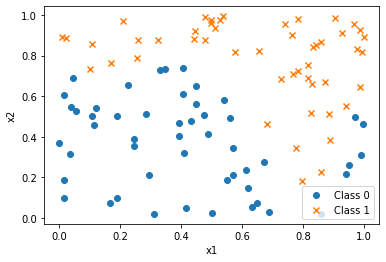

In [6]:
# c)
import math
import random
import matplotlib.pyplot as plt


points = []
for i in range(100):
    x1 = random.uniform(0,1)
    x2 = random.uniform(0,1)
    if func_x(x1) > x2:
        points.append((x1, x2, 0))
    else:
        points.append((x1, x2, 1))

# Combine points into a single array of tuples
points_arr = np.array(points)

class_0_points = [(x, y) for x, y, c in points if c == 0]
class_1_points = [(x, y) for x, y, c in points if c == 1]

plt.scatter(*zip(*class_0_points), marker='o', label='Class 0')
plt.scatter(*zip(*class_1_points), marker='x', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Q3

In [7]:
# a)
def weight(curr, next_nodes):
    #np.random.uniform(low = -0.3, high = 0.3, size=(next_nodes, curr))
    return np.random.rand(next_nodes,curr)

def weights_list(l_nodes):
    W = []
    for i in range(len(l_nodes) - 1):
        temp = weight(l_nodes[i] + 1, l_nodes[i+1])
        W.append(temp)
    return W

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


nodes = [2,3,1]
weights = weights_list(nodes)
weights

[array([[0.57859956, 0.00705677, 0.48087507],
        [0.75005344, 0.87041335, 0.02493619],
        [0.34563388, 0.53475555, 0.56641049]]),
 array([[0.76541207, 0.5122076 , 0.66871399, 0.77527058]])]

In [8]:
#b)
def forward_prop(x,w):
    z=w @ x
    a=sigmoid(z)
    return a

def full_forward_prop(w,x1,x2):
    a=[]
    a_t=[]
    l1=np.array([1,x1,x2])
    a.append(l1)
    for i in range(len(w)):
        a_temp=(forward_prop(a[i],w[i]))
        if (i !=(len(w)-1)):
            a_temp=np.insert(a_temp,0,1)
        a.append(a_temp)
    return a

activation=full_forward_prop(weights,points_arr[1][0],points_arr[1][1])

activation

[array([1.        , 0.56203019, 0.49010063]),
 array([1.        , 0.69386322, 0.77755479, 0.71581184]),
 array([0.89986484])]

In [9]:
# # Get input values for the point we want to compute the activation for
x1, x2, target = points_arr[1]

# Compute final activation for the point
final_activation = full_forward_prop(weights, x1, x2)[-1][-1]

# Compute error delta at the final layer
error_delta = final_activation - target

print("Error delta at the final layer:", error_delta)


Error delta at the final layer: 0.8998648404359956
